In [10]:
%matplotlib inline
from nets import load_model
from datasets import get_dataset
from losses import compute_acc
import plot_helper
import numpy as np

from matplotlib import pyplot as plt

In [25]:
m, summary = load_model("../artifacts-server/mpg-server/experiment-mnist-256d-test-robustness/mnist-various-opts-M1/vdb-mnist--2019-12-19--02-34-28-965346")

Taking nets.vdb


In [26]:
ds = get_dataset(summary['dataset'])

In [27]:
test_images, test_labels = ds[1]

In [28]:
acc = compute_acc(m, ds[1][0], ds[1][1], 12)

In [29]:
print(acc)

tf.Tensor(0.9476, shape=(), dtype=float32)


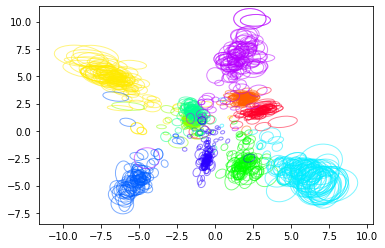

In [23]:
def plot(ax, model, cm=plt.get_cmap('gist_rainbow')):
    data_ix = np.loadtxt("../datasets/mnist_2d_samples").astype(int)


    latent, _ = model(test_images[data_ix])
    labels = test_labels[data_ix]

    mu = latent.loc.numpy()
    cov = latent.covariance().numpy()


    for i in range(10):
        ix = np.argwhere(labels == i)
        ix = ix.reshape(-1).astype(int)

        
        plt.scatter(mu[ix, 0], mu[ix, 1], color=cm(i/10), alpha=0.0, label=i)

        for j in range(ix.shape[0]):
            ij = ix[j]
            plot_helper.plot_ellipse(ax, mu[ij,:], cov[ij, :, :], edgecolor=cm(i/10))

plt.figure()
ax = plt.gca()
plot(ax, m)

In [ ]:
latent